## Star Dataset for Stellar Classification using KNN

In [1]:
import numpy as np
import pandas as pd

##### About Data
1. Vmag: Visual Apparent Magnitude of the Star¶
2. Plx : Distance Between the Star and the Earth
3. e_Plx: Standard Error of Plx (Drop the Row if you find the e_Plx is too high!)
4. B-V : B-V color index. (A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color index close to 2.0. Other stars are somewhere in between.)
5. SpType: Spectral type
6. Amag: Absolute Magnitude of the Star
7. TargetClass: Whether the Star is Dwarf (0) or Giant (1)

In [2]:
data = pd.read_csv("Star3642_balanced.csv")
data.head(8)

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
5,4.90,8.37,0.76,-0.091,B9III,14.513628,0
6,8.60,5.09,1.37,0.448,F3V,17.133589,1
7,6.24,8.08,1.15,0.680,G0III,15.777057,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [4]:
data.dtypes

Vmag           float64
Plx            float64
e_Plx          float64
B-V            float64
SpType          object
Amag           float64
TargetClass      int64
dtype: object

In [5]:
data.shape

(3642, 7)

In [6]:
data.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,29.249165,1.000000


In [7]:
data["SpType"].value_counts()

K0III          293
K1III          200
K2III          156
G8III          135
F5V            125
              ... 
B9.5IV           1
B0Ibp            1
M0V              1
B1Vv SB          1
M0/M1IIICNp      1
Name: SpType, Length: 584, dtype: int64

In [8]:
data.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

## Boxplots of star data

Vmag              AxesSubplot(0.125,0.798085;0.133621x0.0819149)
Plx            AxesSubplot(0.285345,0.798085;0.133621x0.0819149)
e_Plx           AxesSubplot(0.44569,0.798085;0.133621x0.0819149)
B-V            AxesSubplot(0.606034,0.798085;0.133621x0.0819149)
Amag           AxesSubplot(0.766379,0.798085;0.133621x0.0819149)
TargetClass       AxesSubplot(0.125,0.699787;0.133621x0.0819149)
dtype: object

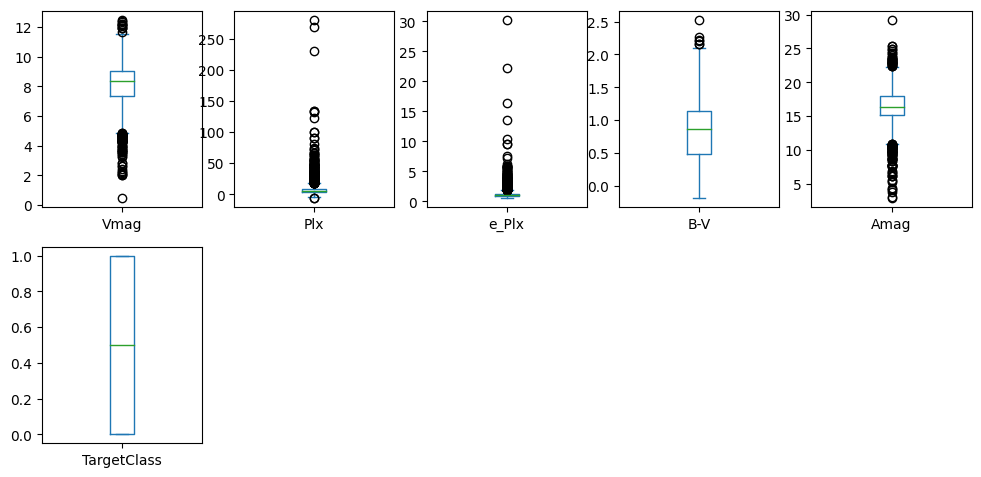

In [9]:
data.plot(kind='box', subplots=True, layout=(8,5), figsize=(12, 24))

In [10]:
data = data[data['Vmag'] < data['Vmag'].quantile(0.9)]
data = data[data['Plx'] < data['Plx'].quantile(0.9)]
data = data[data['e_Plx'] < data['e_Plx'].quantile(0.9)]
data = data[data['B-V'] < data['B-V'].quantile(0.9)]
data = data[data['Amag'] < data['Amag'].quantile(0.9)]

Vmag              AxesSubplot(0.125,0.798085;0.133621x0.0819149)
Plx            AxesSubplot(0.285345,0.798085;0.133621x0.0819149)
e_Plx           AxesSubplot(0.44569,0.798085;0.133621x0.0819149)
B-V            AxesSubplot(0.606034,0.798085;0.133621x0.0819149)
Amag           AxesSubplot(0.766379,0.798085;0.133621x0.0819149)
TargetClass       AxesSubplot(0.125,0.699787;0.133621x0.0819149)
dtype: object

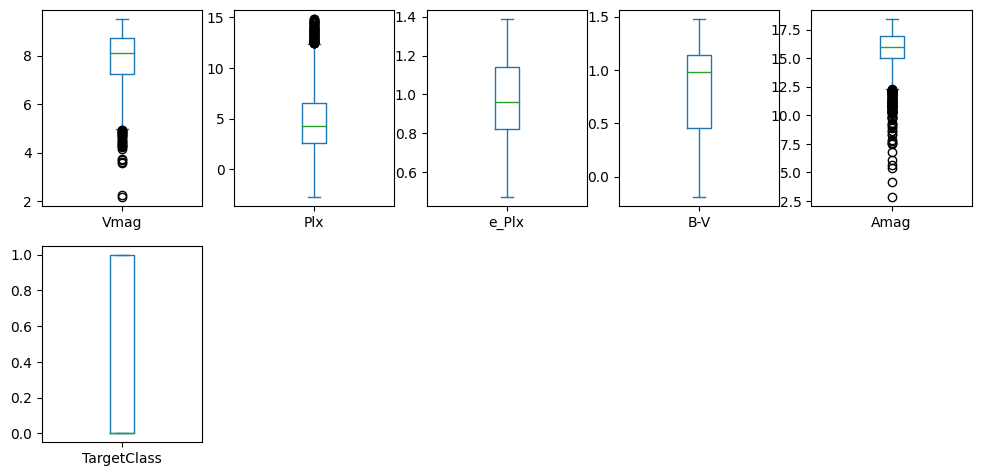

In [11]:
data.plot(kind='box', subplots=True, layout=(8,5), figsize=(12, 24))

In [12]:
data.shape

(2138, 7)

## Encode SpType values

In [13]:
from sklearn.preprocessing import LabelEncoder

data['SpType'] = LabelEncoder().fit_transform(data["SpType"])
data.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,394,16.678352,0
1,8.70,2.31,1.29,-0.045,82,15.518060,0
2,5.77,5.50,1.03,0.855,255,14.471813,0
3,6.72,5.26,0.74,-0.015,122,15.324928,1
5,4.90,8.37,0.76,-0.091,140,14.513628,0


## Create KNN class

In [14]:
from collections import Counter

class KNN:
    def __init__(self, neighbors: int = 2) -> None:
        self.neighbors = neighbors

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self.X_train = X
        self.y_train = y

    def predict(self, X: np.ndarray) -> np.ndarray:
        y = list()
        for x in X:
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
            neighbors_labels = [self.y_train[i] for i in np.argsort(distances)[:self.neighbors]]
            y.append(Counter(neighbors_labels).most_common(1)[0][0])
        return np.array(y)
        

## Classify stars with KNN

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop("TargetClass", axis = 1).values
y = data["TargetClass"].values 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(1710, 6)

In [18]:
knn = KNN(2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred, y_test

(array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 

## Evaluate the result with the Accuracy metric

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9369158878504673